# Dogs vs Cats 

In this notebook there are 12500 images of dogs and 12500 images of cats, and i will try to classify them into dog or cat, using different models 

### Import necessary libraries

In [274]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.image as mpimg
import os
import cv2
from skimage.io import imread
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA   
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
import xgboost
import xgboost as xgb
from sklearn import metrics
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

### Some images from the dataset

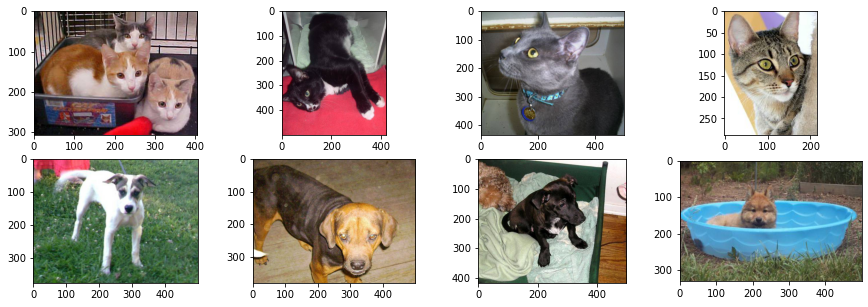

In [244]:
f = plt.figure(figsize=(15,5))
for i in range(1,5):
    r=random.randint(1,2000)#random image of dog
    img=mpimg.imread("C:/Users/97254/.conda/train/cat.{}.jpg".format(r))#loading image
    ax=f.add_subplot(2,4,i)
    plt.imshow(img)
    r=random.randint(1,2000)#random image of dog
    img=mpimg.imread("C:/Users/97254/.conda/train/dog.{}.jpg".format(r))#loading image
    ax=f.add_subplot(2,4,i+4)
    plt.imshow(img)

**The images has different sizes, and we want to work with same size for all images**

**So i reshaped the images to same size-75*75 and grayscale the images**

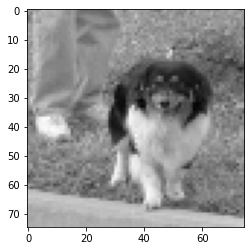

In [245]:
#grayscale image
exm=cv2.imread("C:/Users/97254/.conda/train/dog.2.jpg")#loading image
bnw_exm=cv2.cvtColor(exm, cv2.COLOR_RGB2GRAY)
bnw_exm=cv2.resize(bnw_exm,(75,75))
plt.imshow(bnw_exm,cmap='gray')
plt.show()

## Data preperation

**First, i created a list and added all images to the list**

In [246]:
from os import listdir
X = list()
for file in listdir('C:/Users/97254/.conda/train/'):
    img = cv2.imread("C:/Users/97254/.conda/train/"+file)#loading image
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#grayscale image
    resized_img = cv2.resize(gray_img, (75,75))#resize to 75*75
    X.append(resized_img)

In [247]:
y.shape

(25000, 5625)

**Reduce the array to 2 dim(neccesary for creating dataframe)**

In [248]:
X=np.asarray(X)
X.shape

(25000, 75, 75)

In [249]:
X=X.reshape((25000,5625))
X.shape

(25000, 5625)

In [250]:
df = pd.DataFrame(X)

In [251]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5615,5616,5617,5618,5619,5620,5621,5622,5623,5624
0,170,174,181,185,189,193,197,199,202,204,...,7,3,3,3,3,2,2,2,2,2
1,43,43,51,47,40,45,46,61,34,45,...,55,41,42,51,54,59,62,65,50,32
2,43,40,46,49,58,53,50,60,53,50,...,77,115,150,163,156,134,147,160,172,155
3,220,223,228,231,224,235,227,225,228,231,...,239,234,228,215,205,203,213,222,212,213
4,114,121,102,85,112,133,160,146,171,208,...,100,105,94,93,93,93,115,92,95,85


**Create new columm-'label'(dog or cat)**

**Beause the first half of the images are cats, i filled the 'label' columm with zeros, and the second half with ones**

In [252]:
z=np.zeros(12500)
z_o=np.concatenate((labels,np.ones(12500)))
df['label']=z_o

In [253]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,label
0,170,174,181,185,189,193,197,199,202,204,...,3,3,3,3,2,2,2,2,2,0.0
1,43,43,51,47,40,45,46,61,34,45,...,41,42,51,54,59,62,65,50,32,0.0
2,43,40,46,49,58,53,50,60,53,50,...,115,150,163,156,134,147,160,172,155,0.0
3,220,223,228,231,224,235,227,225,228,231,...,234,228,215,205,203,213,222,212,213,0.0
4,114,121,102,85,112,133,160,146,171,208,...,105,94,93,93,93,115,92,95,85,0.0


In [254]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,label
24995,140,142,144,146,147,149,148,150,151,152,...,164,164,164,166,166,167,168,168,169,1.0
24996,101,77,95,105,113,72,86,81,65,76,...,77,88,93,79,89,86,79,102,72,1.0
24997,33,37,52,61,52,53,58,40,48,53,...,114,120,133,121,130,101,129,115,178,1.0
24998,255,248,235,219,200,146,104,69,56,60,...,107,100,79,89,96,112,110,108,120,1.0
24999,240,242,242,241,244,249,246,244,243,243,...,254,254,254,254,254,254,254,254,254,1.0


In [255]:
df.iloc[12499:12501, 5625:5626]

,label
12499,0.0
12500,1.0


In [260]:
y = df['label']
x = df.drop(['label'], axis=1).to_numpy()

In [261]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

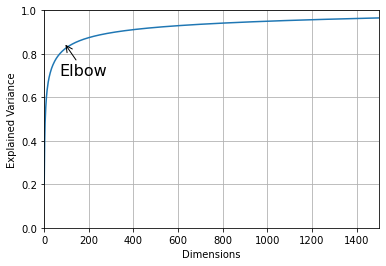

In [262]:
pca = PCA()
pca.fit(X_train)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.axis([0, 1500, 0, 1])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.annotate("Elbow", xy=(90, 0.85), xytext=(70, 0.7),arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

In [263]:
def pipe(model):
    pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=50)),('model', model)])
    return pipe

In [264]:
def result(model):
    res= pipe(model)
    res.fit(X_train, y_train)
    y_predict = res.predict(X_test)
    print(round(metrics.accuracy_score(y_test,y_predict)*100,4),"%")

In [265]:
rf = result(RandomForestClassifier())
rf

62.6667 %


In [266]:
knn = result(KNeighborsClassifier(n_neighbors=7))
knn

60.2 %


In [278]:
xgbc=xgb.XGBClassifier(n_estimators=50,use_label_encoder=False,eval_metric='mlogloss')
xgbc.fit(X_train,y_train)
y_predict = xgbc.predict(X_test)
print(round(metrics.accuracy_score(y_test,y_predict)*100,4),"%")

64.3867 %


In [268]:
voting = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('xgb', xgbc)],voting='hard')
result(voting)

62.28 %


In [276]:
voting = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('xgb', xgbc)],voting='soft')
result(voting)

63.0 %


In [270]:
def pipe200(model):
    pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=500)),('model', model)])
    return pipe

In [271]:
def result200(model):
    res= pipe200(model)
    res.fit(X_train, y_train)
    y_predict = res.predict(X_test)
    print(round(metrics.accuracy_score(y_test,y_predict)*100,4),"%")

In [272]:
voting = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('xgb', xgbc)],voting='soft')
result200(voting)

61.4533 %


In [275]:
rfc=RandomForestClassifier(n_estimators=50,max_depth=7,random_state=10)
cvs=cross_val_score(rfc,X_train,y_train,cv=5,scoring='accuracy')
cvs

array([0.60114286, 0.60857143, 0.61514286, 0.60971429, 0.62228571])